In [ ]:
from os import listdir
listdir()
import os
os.listdir()

In [40]:
f = open('desktop/nd2.fasta.txt', 'r')

In [41]:
nd2 = f.readlines()

In [ ]:
print (nd2[0:6])

In [43]:
len(nd2)

380

In [ ]:
for line_num, line in enumerate(nd2[0:5]):
    print(line)

In [ ]:
for line_num, line in enumerate(nd2[0:6]):
    if line_num%3 ==1:
        print(line)

This shows that every 3 lines is a new string

In [ ]:
print(nd2[1])
print(nd2[4])
print(nd2[7])

In [47]:
print(nd2[36])

>Selasphorus_flammula



Any line that is not an increment of 3 is not a DNA sequence (ex: a space)

In [ ]:
for line_num,line in enumerate(nd2[1]):  
    if line_num%3 ==1:
        for base in line:
            print(base)

Gets all possible kmers (k) of any size and how many times they appear in a specific line (l), a line that is not a DNA sequence will result in 'error'

In [51]:
k = 2
#first string
l=10
counter = {}
for line_num,line in enumerate(nd2):
    line = line.rstrip()
    if l%3!= 1: 
        print ('error')
        break
    if line_num==l:
        for i,base in enumerate(line[:-k+1]):
            kmer = line[i:i+k]
            if kmer in counter:
                counter[kmer] += 1
            else:
                counter[kmer] = 1
print(counter)

{'TT': 55, 'TA': 91, 'AT': 84, 'AA': 121, 'TG': 25, 'GA': 27, 'AC': 104, 'CC': 106, 'CT': 108, 'GC': 42, 'CA': 114, 'TC': 88, 'AG': 44, 'GG': 14, 'CG': 12, 'GT': 11}


In [52]:
import glob
filelist = glob.glob('desktop/*.txt')
print(filelist)

['desktop/nd2.fasta.txt']


Allows for possible kmers to be counted in a specific line for any size k and how many kmers there actually are

In [54]:
l=1 # l= 1+=3
def count_kmers(k,nd2,counter = {}):
    for line_num,line in enumerate(nd2): 
            line = line.rstrip()
            if l%3!= 1: 
                print ('error')
                break
            if line_num==l:
                for i,base in enumerate(line[:-k+1]):
                    kmer = line[i:i+k]
                    if kmer in counter:
                        counter[kmer] += 1
                    else:
                        counter[kmer] = 1
    return(counter)


counter={}
k=2
for filename in glob.glob('desktop/*.txt'):
    f = open(filename, 'r')
    nd2 = f.readlines()
    counter = count_kmers(k, nd2, counter)
#print(counter)
if len(counter)==0:
    print('Number of kmers: 4')
else:
    print('Number of kmers: ', len(counter))
print('Number of possible kmers: ',4**k)

Number of kmers:  16
Number of possible kmers:  16


In [55]:
import pandas 

In [56]:
counter_df = pandas.DataFrame(counter, index = ['kmers'])
print(counter_df)

        AA   AC  AG  AT   CA   CC  CG   CT  GA  GC  GG  GT  TA  TC  TG  TT
kmers  114  108  37  72  112  131  15  112  25  43  20  10  81  88  26  52


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

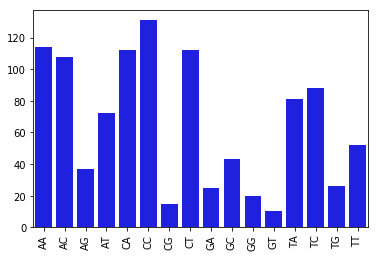

In [58]:
import seaborn as sns
sns.barplot(data = counter_df, color = 'b');
plt.xticks(rotation=90);
plt.savefig('kmer_freq.png')

Shows the ratio of kmers of any size for a specific line

In [59]:
l:12
for k in range(8):
    counter = {}
    for line_num,line in enumerate(nd2): 
                line = line.rstrip()
                if l%3!= 1: 
                    print ('error')
                    break
                if line_num==l:
                    for i,base in enumerate(line):
                        kmer = line[i:i+k]
                        if kmer in counter:
                            counter[kmer] += 1
                        else:
                            counter[kmer] = 1
    print(k , ':' , len(counter))

0 : 1
1 : 4
2 : 17
3 : 65
4 : 203
5 : 467
6 : 769
7 : 953


A code that is created should be able to be tested and then applied to other files. I was unable to do this but I would have used Sublime to write out the code and test it with a decimal, negative number, and large/small number.